In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

In [3]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [4]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


<AxesSubplot:xlabel='sex', ylabel='count'>

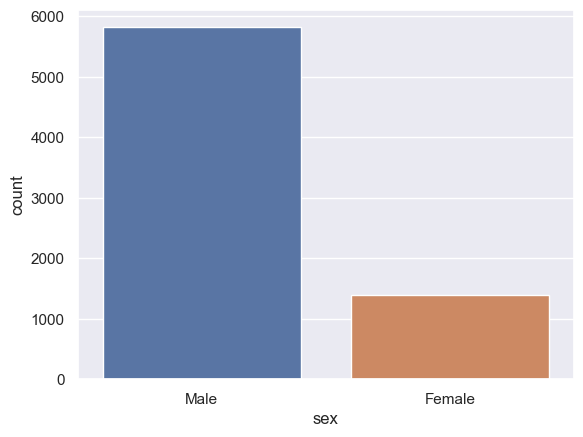

In [5]:
sns.set_theme() 
sns.countplot(x=df["sex"])

<AxesSubplot:xlabel='age_cat', ylabel='count'>

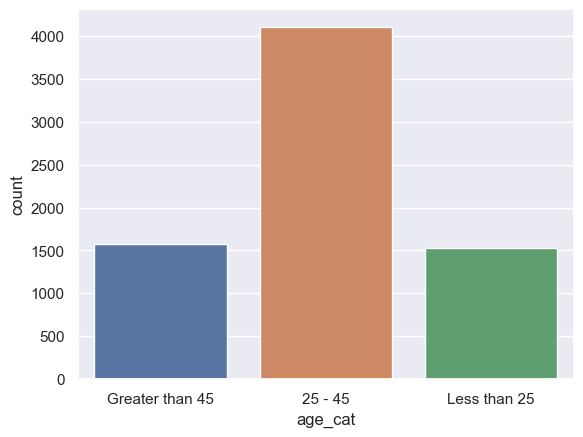

In [6]:
sns.set_theme() 
sns.countplot(x=df["age_cat"])

<AxesSubplot:xlabel='age', ylabel='Count'>

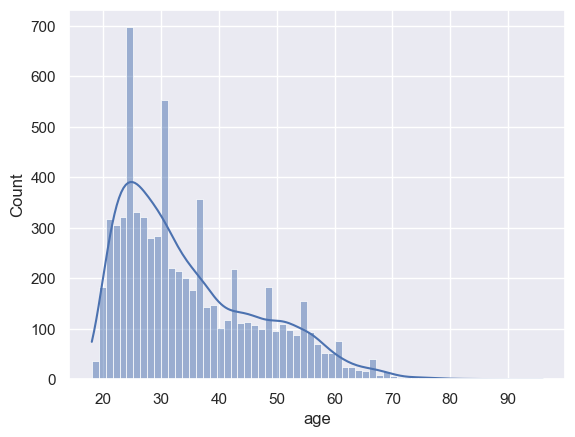

In [7]:
sns.histplot(x=df["age"], kde=True, bins=65)

Text(0.5, 1.0, 'Jail Time After First Charge')

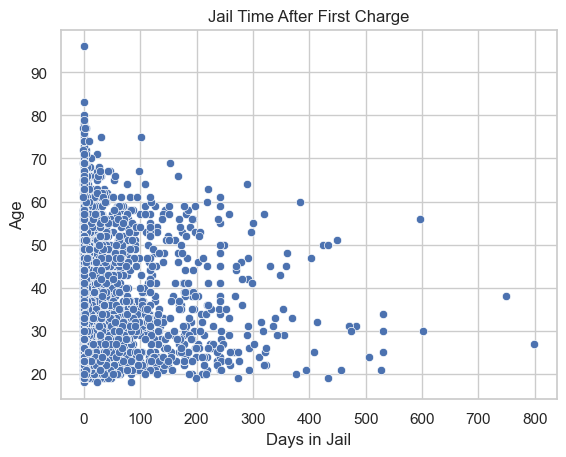

In [34]:
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"])
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"])
df["days_in_jail"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days

sns.set_style("whitegrid")
sns.scatterplot(data=df, x="days_in_jail", y="age")
ax = plt.gca()
ax.set_xlabel("Days in Jail")
ax.set_ylabel("Age")
ax.set_title("Jail Time After First Charge")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'African-American'),
  Text(2, 0, 'Caucasian'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Asian')])

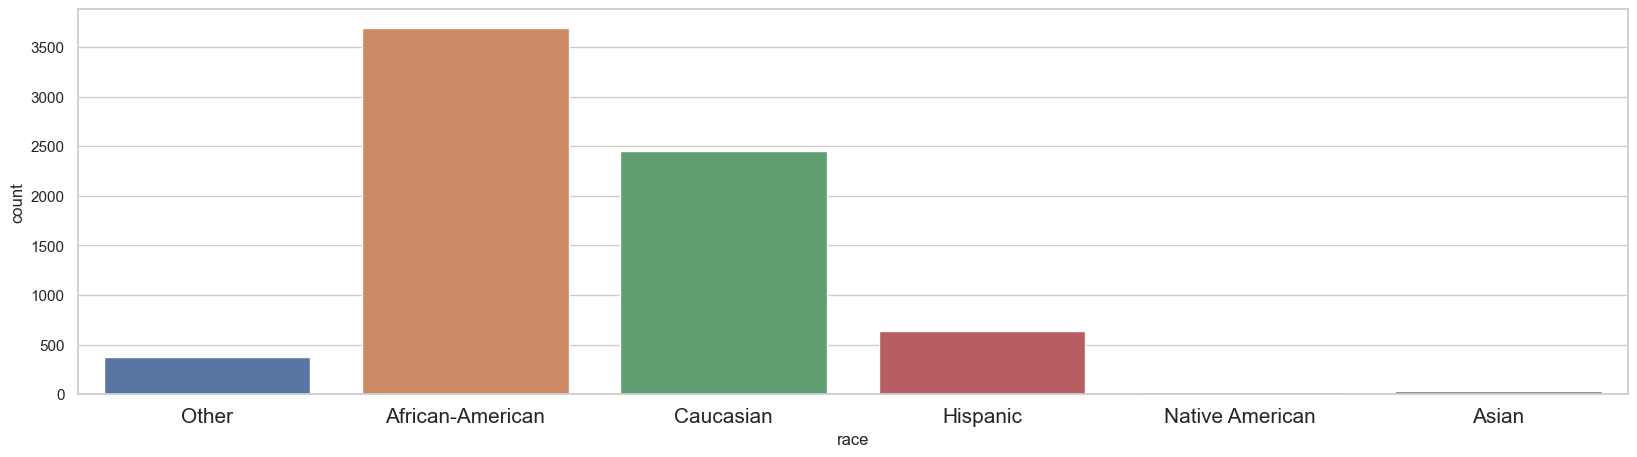

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["race"])
plt.xticks(fontsize = 15)